# Melanoma Detection Assignment

## Problem Statement: <br>

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

In [ ]:
#Importing Libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing Datasets
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
# Creating Training Dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_train,
        seed = 123,
        validation_split = 0.2,
        subset = 'training',
        image_size = (img_height, img_width),
        batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
# Creating Validation Dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_train,
        seed = 123,
        validation_split = 0.2,
        subset = 'validation',
        image_size = (img_height, img_width),
        batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

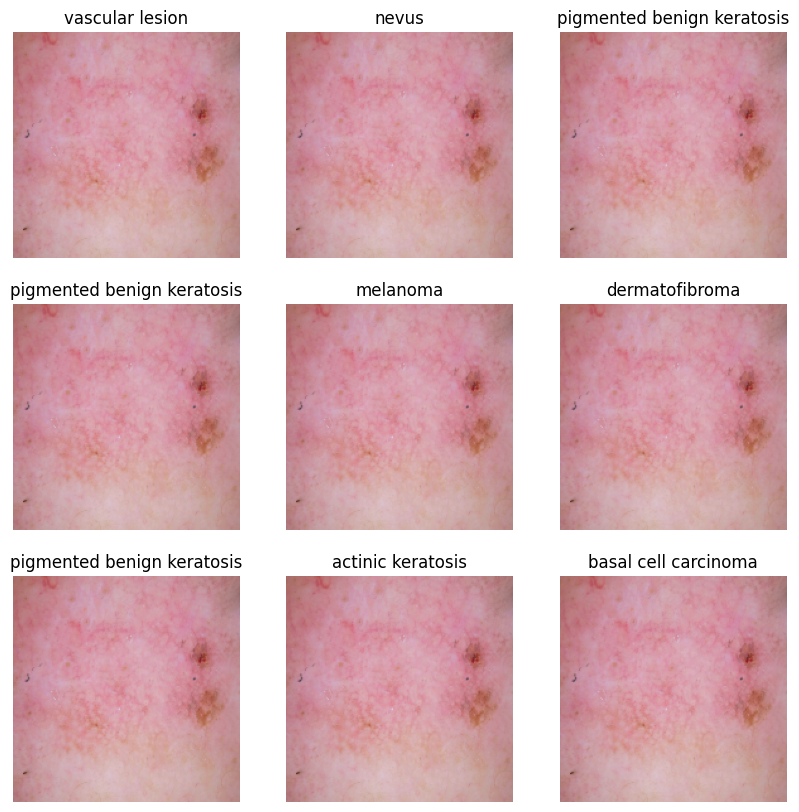

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[1].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [ ]:
#creating model

num_classes = 9 #As target class has 9 labels

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data= val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 703s 3s/step - loss: 2.0336 - accuracy: 0.2723 - val_loss: 1.8416 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7206 - accuracy: 0.3890 - val_loss: 1.5786 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6232 - accuracy: 0.4286 - val_loss: 1.5317 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4168 - accuracy: 0.4994 - val_loss: 1.4521 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3043 - accuracy: 0.5480 - val_loss: 1.4068 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2147 - accuracy: 0.5692 - val_loss: 1.5675 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1587 - accuracy: 0.5915 - val_loss: 1.4324 - val_accuracy: 0.5369
Epoch 8/20
56

### Visualizing training results

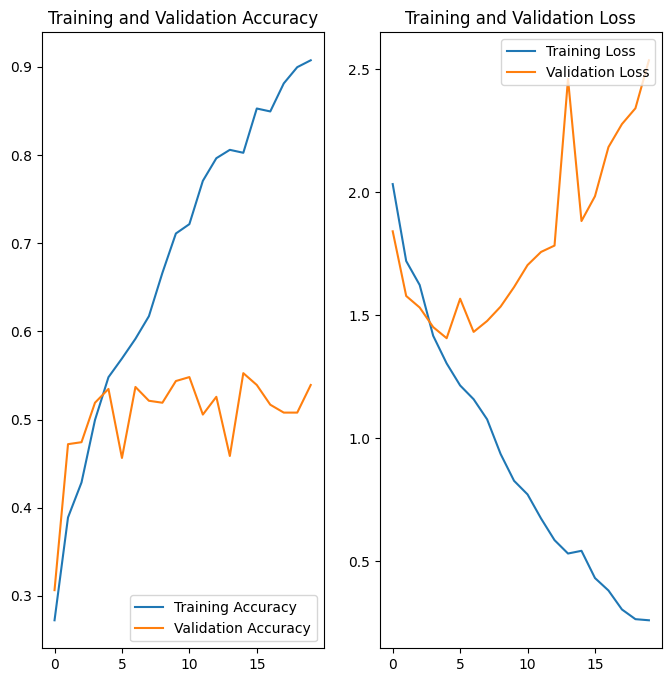

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

***Comments:***
- From the above graph we observe that the training accuracy of the model is increasing but the validation accuracy of the model is stagnant at 55%.
- High training accuracy in the model indicates that the model is learning the noise in the data as well. The low accuracy in the validation shows a lack of generalization. The model is overfitting.
- To adjust the overfitting we will be using augmentation technique. Since Training data available is less we will generate new samples by slightly modifying the existing training data.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = keras.Sequential([
                        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape= (img_height, img_width, 3)),
                        layers.experimental.preprocessing.RandomRotation(0.1),
                        layers.experimental.preprocessing.RandomZoom(0.1),
])

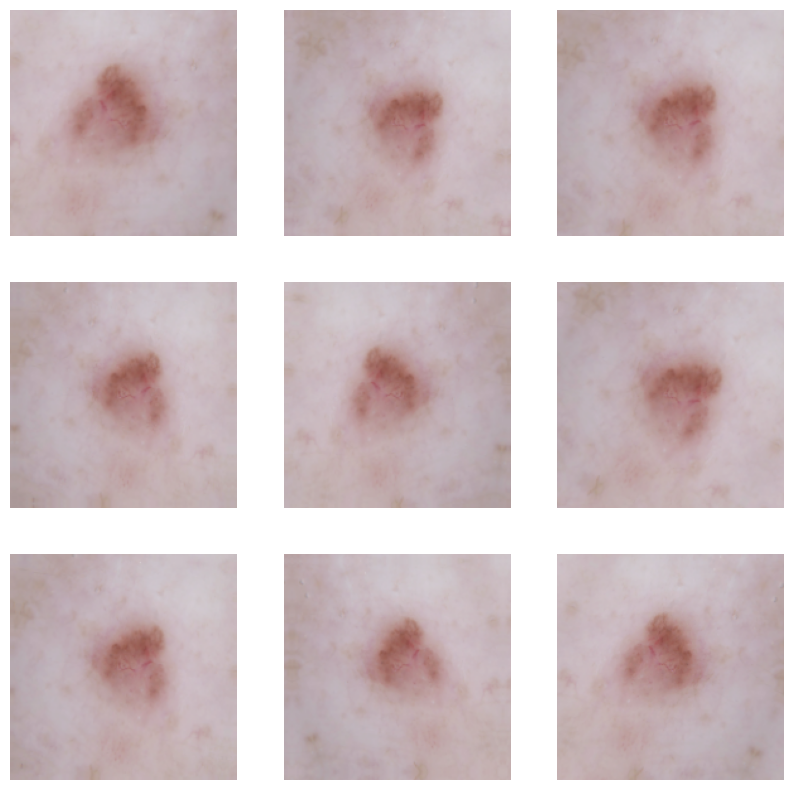

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs)

Epoch 1/20
56/56 [==============================] - 10s 42ms/step - loss: 2.0137 - accuracy: 0.2762 - val_loss: 1.8054 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 2s 31ms/step - loss: 1.6263 - accuracy: 0.4230 - val_loss: 1.5655 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4608 - accuracy: 0.4944 - val_loss: 1.4893 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4158 - accuracy: 0.4900 - val_loss: 1.4542 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3419 - accuracy: 0.5257 - val_loss: 1.5419 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.2913 - accuracy: 0.5452 - val_loss: 1.3497 - val_accuracy: 0.5548
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2884 - accuracy: 0.5402 - val_loss: 1.4052 - val_accuracy: 0.5235
Epoch 8/20
5

### Visualizing the results

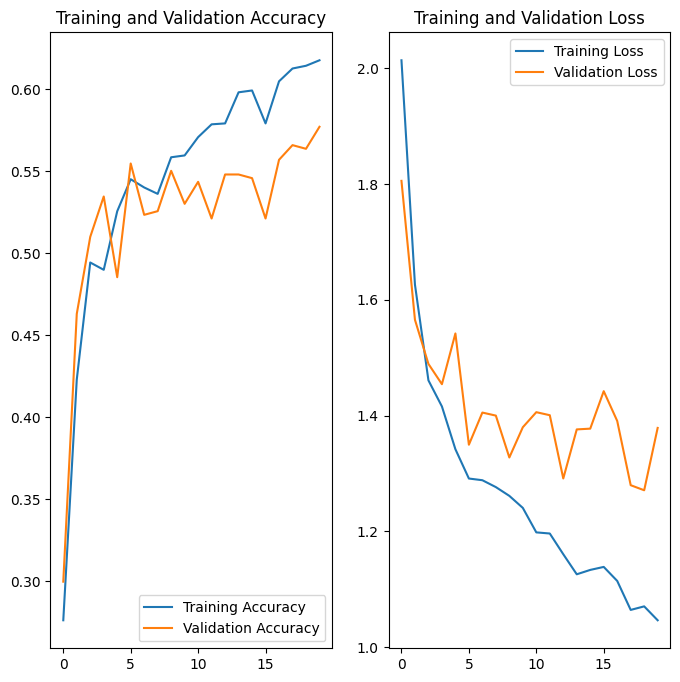

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***Comments:***
- With augmentation the problem of overfitting has been adressed.
- From the graphs we can observe that the training and the validation accuracy are within the same range.
- The model is performing poorly in both the sets, i.e., the model is underfitting now.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list))

2239


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0024925.jpg', 'squamous cell carcinoma'), ('/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025411.jpg', 'squamous cell carcinoma')]


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns = ['Path', 'Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
1,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
2,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
3,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
4,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma


In [ ]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [ ]:
original_df[['Label']].value_counts(normalize= True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
- 'seborrheic keratosis' has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
- 'pigmented benign keratosis' and 'melanoma' dominate the data with 20.6% and 19.5% of the samples respectively.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    if i == 'pigmented benign keratosis':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(538)
    elif i == 'melanoma':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(562)
    elif i == 'basal cell carcinoma':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(624)
    elif i == 'nevus':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(643)
    elif i == 'squamous cell carcinoma':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(819)
    elif i == 'vascular lesion':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(861)
    elif i == 'actinic keratosis':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(886)
    elif i == 'dermatofibroma':
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(905)
    else:
        p = Augmentor.Pipeline(path_to_training_dataset + i)
        p.rotate(probability= 0.7, max_left_rotation= 10, max_right_rotation= 10)
        p.sample(923)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DFA76623790>: 100%|██████████| 886/886 [00:34<00:00, 25.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DFA767469B0>: 100%|██████████| 624/624 [00:25<00:00, 24.74 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DFA76612530>: 100%|██████████| 905/905 [00:35<00:00, 25.70 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7DFAE656FB20>: 100%|██████████| 562/562 [01:48<00:00,  5.16 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7DFA7679D510>: 100%|██████████| 643/643 [01:40<00:00,  6.42 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DFA767DAEF0>: 100%|██████████| 538/538 [00:22<00:00, 24.38 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7DFA7662BD00>: 100%|██████████| 923/923 [01:19<00:00, 11.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DFA767EFCD0>: 100%|██████████| 819/819 [00:32<00:00, 25.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DFA76744520>: 100%|██████████| 861/861 [00:38<00:00, 22.43 Samples/s]


In [ ]:
path_to_training_dataset= str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC23B97AA40>: 100%|██████████| 500/500 [00:24<00:00, 20.03 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC28BA017B0>: 100%|██████████| 500/500 [00:23<00:00, 21.53 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC2702AFE20>: 100%|██████████| 500/500 [00:21<00:00, 23.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7DC292063310>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC22A923AF0>: 100%|██████████| 500/500 [01:26<00:00,  5.75 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC288ACF070>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC288977F70>: 100%|██████████| 500/500 [00:41<00:00, 12.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC288AFEA10>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC2702AFFA0>: 100%|██████████| 500/500 [00:19<00:00, 25.97 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6761


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list_new[:2]

['/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031692.jpg_0239b344-bf34-4ec7-ae40-cba0518a6d15.jpg',
 '/content/gdrive/MyDrive/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025350.jpg_9d24a99c-dde6-4e25-a8fa-c38b0d9d1ad3.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_list_new[:2]

['squamous cell carcinoma', 'squamous cell carcinoma']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns = ['Path', 'Label'])
new_df = original_df.append(df2)
new_df.shape

(9000, 2)

In [ ]:
new_df.head()

,Path,Label
0,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
1,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
2,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
3,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma
4,/content/gdrive/MyDrive/CNN Assignment/Skin ca...,squamous cell carcinoma


In [ ]:
new_df['Label'].value_counts()

squamous cell carcinoma       1000
pigmented benign keratosis    1000
dermatofibroma                1000
seborrheic keratosis          1000
vascular lesion               1000
actinic keratosis             1000
nevus                         1000
melanoma                      1000
basal cell carcinoma          1000
Name: Label, dtype: int64

So, we have added aprropriate amount of images to each class to bring them up to a 1000 for each class to maintain balance. We can add more images to improve training process.

In [ ]:
new_df['Label'].value_counts(normalize=True)

squamous cell carcinoma       0.111111
pigmented benign keratosis    0.111111
dermatofibroma                0.111111
seborrheic keratosis          0.111111
vascular lesion               0.111111
actinic keratosis             0.111111
nevus                         0.111111
melanoma                      0.111111
basal cell carcinoma          0.111111
Name: Label, dtype: float64

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split= 0.2,
    subset = 'training',
    image_size= (img_height, img_width),
    batch_size= batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split= 0.2,
    subset = 'validation',
    image_size= (img_height, img_width),
    batch_size= batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data= val_ds,
  epochs=epochs
)

Epoch 1/30
225/225 [==============================] - 49s 207ms/step - loss: 1.8013 - accuracy: 0.3031 - val_loss: 1.5147 - val_accuracy: 0.4200
Epoch 2/30
225/225 [==============================] - 47s 206ms/step - loss: 1.4793 - accuracy: 0.4313 - val_loss: 1.3980 - val_accuracy: 0.4556
Epoch 3/30
225/225 [==============================] - 47s 202ms/step - loss: 1.3510 - accuracy: 0.4818 - val_loss: 1.2911 - val_accuracy: 0.5017
Epoch 4/30
225/225 [==============================] - 45s 191ms/step - loss: 1.2526 - accuracy: 0.5182 - val_loss: 1.3003 - val_accuracy: 0.5200
Epoch 5/30
225/225 [==============================] - 47s 204ms/step - loss: 1.2253 - accuracy: 0.5335 - val_loss: 1.1357 - val_accuracy: 0.5722
Epoch 6/30
225/225 [==============================] - 49s 216ms/step - loss: 1.1284 - accuracy: 0.5747 - val_loss: 1.1479 - val_accuracy: 0.5539
Epoch 7/30
225/225 [==============================] - 46s 200ms/step - loss: 1.0800 - accuracy: 0.5875 - val_loss: 1.0183 - val_ac

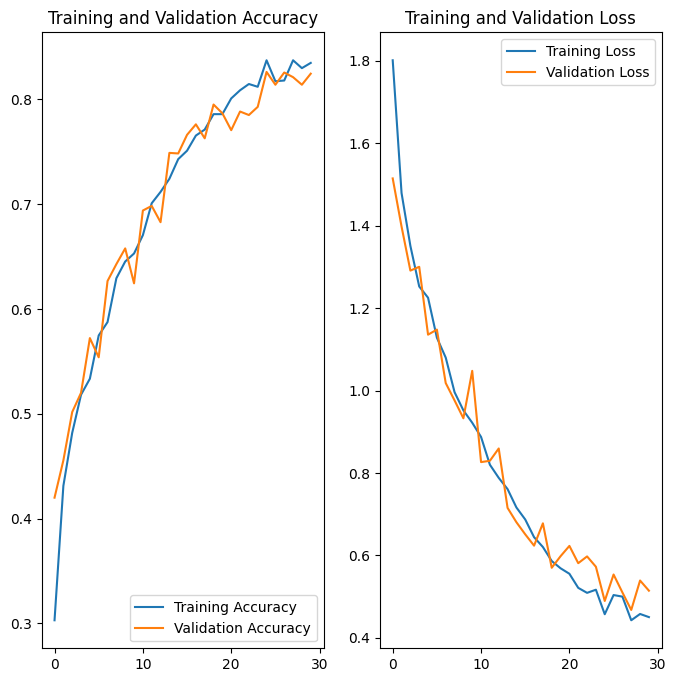

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**Comments:**
- In the final model we can observe that the is no sign of over fitting.
- Augmentation has helped in rebalancing the classes which has helped in improving performance in both training and valdation sets.
- With 30 epochs the model is able to achieve 83% training and 82% validation accuracy.
- The low difference between the accuracies of training and validation sets signifies that the model is able to generalise well.